# 📊 LLM Comparison Dataset Analysis

## 📋 Overview

This analysis examines a comprehensive dataset comparing different Large Language Models (LLMs) across various performance metrics. The investigation is structured into five main sections:

1. **Data Exploration** – Examine dataset structure, distributions, and correlations
2. **Performance Comparison** – Analyze key metrics across different LLM providers
3. **Data Visualization** – Create insightful visualizations to highlight important relationships
4. **Predictive Modeling** – Build models to predict Quality Rating based on technical specifications
5. **Model Application** – Test the best model with new input scenarios

Let's dive into the analysis to understand what differentiates high-performing LLMs from others.

In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style='whitegrid', palette='viridis', font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## 1. 🔍 Data Exploration

### 1.1 Dataset Overview

Let's begin by loading the dataset and examining its structure. This will help us understand what variables we're working with and identify any initial patterns or issues.

In [2]:
path = kagglehub.dataset_download("samayashar/large-language-models-comparison-dataset")
df = pd.read_csv(os.path.join(path, "llm_comparison_dataset.csv"))

display(df.head().style.background_gradient(cmap='Blues', subset=['Quality Rating', 'Speed (tokens/sec)', 'Benchmark (MMLU)']))

,Model,Provider,Context Window,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Open-Source,Price / Million Tokens,Training Dataset Size,Compute Power,Energy Efficiency,Quality Rating,Speed Rating,Price Rating
0,DeepSeek-4,Deepseek,128000,95,2.740000,85,1143,1,18.810000,760952565,13,0.500000,2,2,3
1,Llama-8,Meta AI,300000,284,3.210000,71,1390,1,3.980000,22891342,22,2.070000,1,3,3
2,Llama-5,Meta AI,300000,225,2.950000,85,1406,0,1.020000,827422145,21,0.950000,2,3,2
3,DeepSeek-3,Deepseek,2000000,242,12.890000,72,1264,1,27.630000,694305632,86,3.510000,1,3,3
4,DeepSeek-8,Deepseek,1000000,71,3.800000,77,1381,1,18.520000,378552278,92,1.800000,2,2,3


In [3]:
print("📌 Dataset Shape:", df.shape)
print("\n📌 Column Types:")
display(pd.DataFrame(df.dtypes, columns=['Data Type']))

print("\n📌 Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    display(pd.DataFrame(missing[missing > 0], columns=['Count']))
else:
    print("No missing values found!")

📌 Dataset Shape: (200, 15)

📌 Column Types:


,Data Type
Model,object
Provider,object
Context Window,int64
Speed (tokens/sec),int64
Latency (sec),float64
Benchmark (MMLU),int64
Benchmark (Chatbot Arena),int64
Open-Source,int64
Price / Million Tokens,float64
Training Dataset Size,int64



📌 Missing Values:
No missing values found!


### 1.2 Statistical Summary

Let's examine the descriptive statistics to understand the central tendencies, spread, and potential outliers in our numerical variables.

In [4]:
desc_stats = df.describe().T
desc_stats['range'] = desc_stats['max'] - desc_stats['min']
desc_stats['cv'] = desc_stats['std'] / desc_stats['mean'] * 100

desc_stats = desc_stats.round(2)

display(desc_stats.style.background_gradient(cmap='YlGnBu', subset=['mean', 'std', 'range']))

,count,mean,std,min,25%,50%,75%,max,range,cv
Context Window,200.000000,637180.000000,690943.890000,128000.000000,200000.000000,256000.000000,1000000.000000,2000000.000000,1872000.000000,108.440000
Speed (tokens/sec),200.000000,163.240000,79.190000,20.000000,93.750000,165.500000,236.000000,294.000000,274.000000,48.510000
Latency (sec),200.000000,9.360000,5.490000,0.600000,4.270000,8.820000,14.040000,19.800000,19.200000,58.660000
Benchmark (MMLU),200.000000,77.940000,10.180000,60.000000,69.000000,80.000000,87.000000,94.000000,34.000000,13.060000
Benchmark (Chatbot Arena),200.000000,1192.960000,174.650000,902.000000,1043.250000,1200.500000,1343.750000,1493.000000,591.000000,14.640000
Open-Source,200.000000,0.490000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,102.280000
Price / Million Tokens,200.000000,14.480000,8.890000,0.200000,6.090000,14.660000,21.520000,29.890000,29.690000,61.420000
Training Dataset Size,200.000000,490264251.800000,274754372.420000,2012584.000000,262297550.750000,500249365.500000,721085700.500000,984434476.000000,982421892.000000,56.040000
Compute Power,200.000000,46.920000,28.410000,2.000000,22.000000,43.500000,72.000000,99.000000,97.000000,60.550000
Energy Efficiency,200.000000,2.520000,1.460000,0.150000,1.150000,2.530000,3.810000,4.980000,4.830000,57.890000


### 1.3 Categorical Variables Analysis

Let's examine the distribution of our categorical variables to understand the composition of our dataset.

In [5]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Distribution by Provider', 'Open Source vs. Proprietary'])

provider_counts = df['Provider'].value_counts()
fig.add_trace(go.Pie(
    labels=provider_counts.index, 
    values=provider_counts.values,
    textinfo='label+percent',
    marker=dict(colors=px.colors.qualitative.Bold),
    hole=0.4
), row=1, col=1)

opensource_counts = df['Open-Source'].value_counts()
fig.add_trace(go.Pie(
    labels=opensource_counts.index, 
    values=opensource_counts.values,
    textinfo='label+percent',
    marker=dict(colors=px.colors.sequential.Viridis),
    hole=0.4
), row=1, col=2)

fig.update_layout(title_text='Categorical Variables Distribution', height=500)
fig.show()

### 1.4 Distribution of Key Metrics

Let's visualize the distributions of our key numerical variables to understand their shapes and identify any anomalies.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



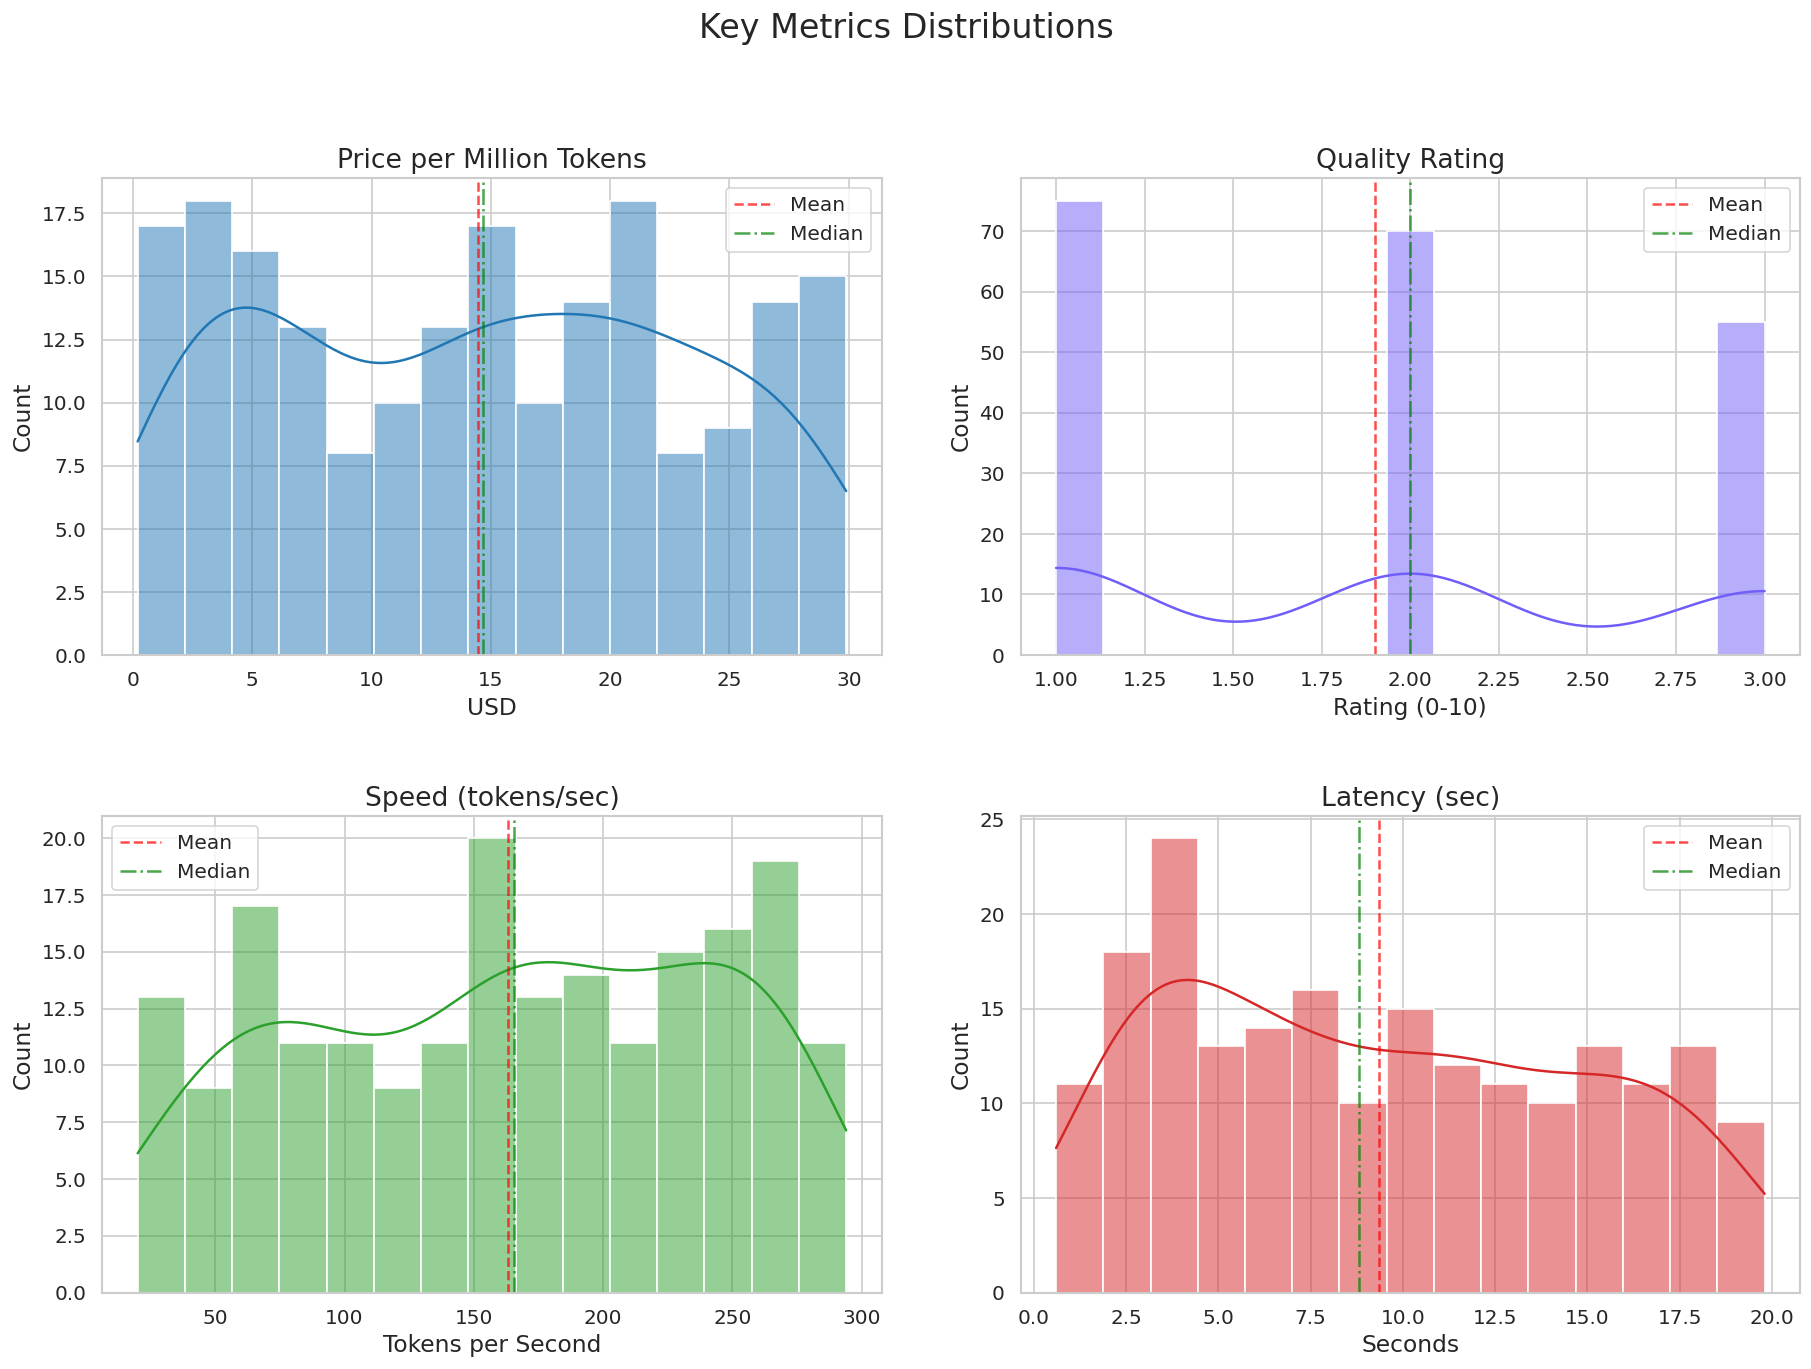

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Key Metrics Distributions', fontsize=20, y=0.98)

sns.histplot(df['Price / Million Tokens'], kde=True, ax=axes[0, 0], color='#2077B4', bins=15)
axes[0, 0].set_title('Price per Million Tokens', fontsize=16)
axes[0, 0].set_xlabel('USD', fontsize=14)
axes[0, 0].axvline(df['Price / Million Tokens'].mean(), color='red', linestyle='--', alpha=0.7, label='Mean')
axes[0, 0].axvline(df['Price / Million Tokens'].median(), color='green', linestyle='-.', alpha=0.7, label='Median')
axes[0, 0].legend()

sns.histplot(df['Quality Rating'], kde=True, ax=axes[0, 1], color='#6F5EF9', bins=15)
axes[0, 1].set_title('Quality Rating', fontsize=16)
axes[0, 1].set_xlabel('Rating (0-10)', fontsize=14)
axes[0, 1].axvline(df['Quality Rating'].mean(), color='red', linestyle='--', alpha=0.7, label='Mean')
axes[0, 1].axvline(df['Quality Rating'].median(), color='green', linestyle='-.', alpha=0.7, label='Median')
axes[0, 1].legend()

sns.histplot(df['Speed (tokens/sec)'], kde=True, ax=axes[1, 0], color='#2CA02C', bins=15)
axes[1, 0].set_title('Speed (tokens/sec)', fontsize=16)
axes[1, 0].set_xlabel('Tokens per Second', fontsize=14)
axes[1, 0].axvline(df['Speed (tokens/sec)'].mean(), color='red', linestyle='--', alpha=0.7, label='Mean')
axes[1, 0].axvline(df['Speed (tokens/sec)'].median(), color='green', linestyle='-.', alpha=0.7, label='Median')
axes[1, 0].legend()

sns.histplot(df['Latency (sec)'], kde=True, ax=axes[1, 1], color='#D62728', bins=15)
axes[1, 1].set_title('Latency (sec)', fontsize=16)
axes[1, 1].set_xlabel('Seconds', fontsize=14)
axes[1, 1].axvline(df['Latency (sec)'].mean(), color='red', linestyle='--', alpha=0.7, label='Mean')
axes[1, 1].axvline(df['Latency (sec)'].median(), color='green', linestyle='-.', alpha=0.7, label='Median')
axes[1, 1].legend()

plt.tight_layout(pad=3.0)
plt.show()

### 1.5 Correlation Analysis

Let's examine the relationships between our numerical variables to identify potential patterns and dependencies.

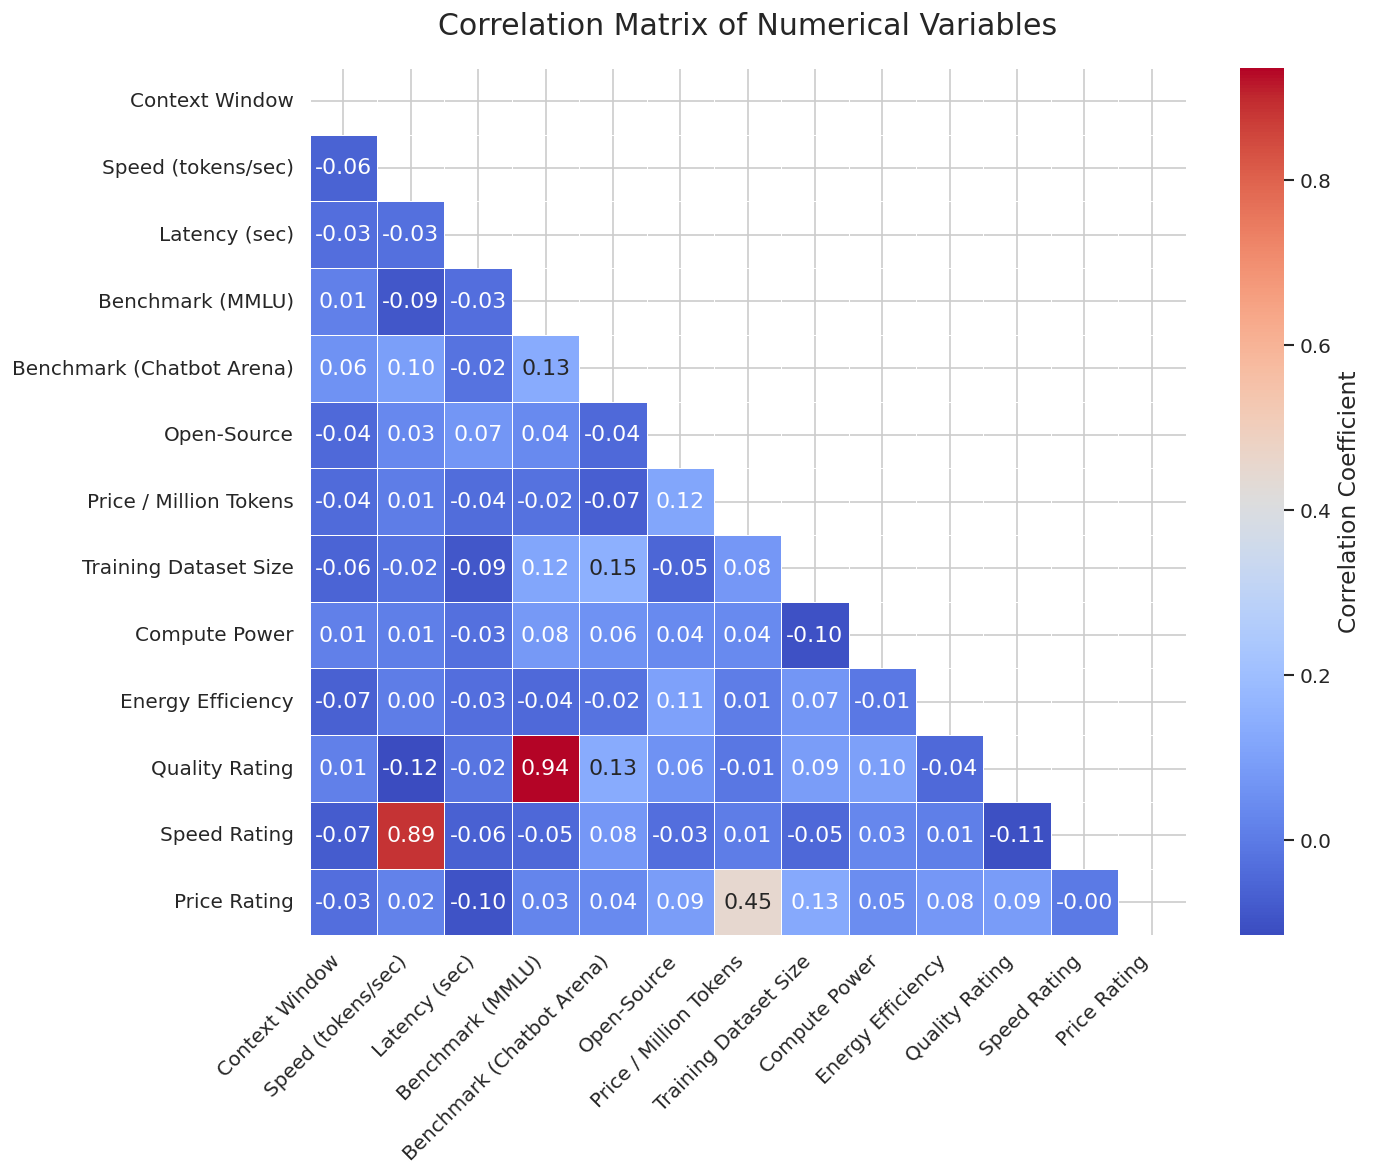


🔍 Strongest Correlations with Quality Rating:


,Quality Rating
Benchmark (MMLU),0.935881
Benchmark (Chatbot Arena),0.132030
Compute Power,0.101301
Training Dataset Size,0.091060
Price Rating,0.086591


In [7]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            mask=mask,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Numerical Variables', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

strong_corr = corr_matrix['Quality Rating'].sort_values(ascending=False).drop('Quality Rating')
print("\n🔍 Strongest Correlations with Quality Rating:")
display(pd.DataFrame(strong_corr).head(5).style.background_gradient(cmap='coolwarm'))

## 2. 📈 Performance Comparison

### 2.1 Provider Performance Analysis

Let's compare the performance metrics across different LLM providers to identify which providers excel in which aspects.

In [8]:
provider_summary = df.groupby('Provider')[
    ['Speed (tokens/sec)', 'Latency (sec)', 'Benchmark (MMLU)', 
     'Benchmark (Chatbot Arena)', 'Price / Million Tokens', 'Quality Rating',
     'Context Window', 'Training Dataset Size', 'Compute Power']
].agg(['mean', 'std', 'min', 'max'])

provider_summary.columns = ['_'.join(col).strip() for col in provider_summary.columns.values]
provider_summary = provider_summary.round(2)

mean_cols = [col for col in provider_summary.columns if col.endswith('_mean')]
display(provider_summary[mean_cols].style.background_gradient(cmap='viridis', axis=0))

,Speed (tokens/sec)_mean,Latency (sec)_mean,Benchmark (MMLU)_mean,Benchmark (Chatbot Arena)_mean,Price / Million Tokens_mean,Quality Rating_mean,Context Window_mean,Training Dataset Size_mean,Compute Power_mean
Provider,,,,,,,,,
AWS,156.370000,12.430000,80.590000,1172.040000,13.320000,2.000000,454074.070000,395454476.370000,47.440000
Anthropic,131.350000,7.720000,77.820000,1146.710000,13.020000,1.880000,682117.650000,496350508.350000,38.650000
Cohere,157.710000,8.750000,78.620000,1205.680000,16.270000,1.910000,597529.410000,585939304.880000,56.680000
Deepseek,150.590000,10.320000,77.500000,1123.410000,14.820000,1.950000,802181.820000,481422251.770000,40.090000
Google,207.170000,8.590000,71.740000,1229.960000,14.420000,1.430000,726956.520000,418747434.910000,56.350000
Meta AI,176.170000,8.100000,76.610000,1252.570000,12.080000,1.830000,484173.910000,529565466.610000,36.610000
Mistral AI,159.130000,9.000000,79.300000,1217.610000,17.010000,2.000000,796000.000000,494628766.390000,50.650000
OpenAI,162.610000,9.340000,79.870000,1182.000000,14.000000,2.100000,627483.870000,491507631.900000,43.000000


In [9]:
performance_metrics = ['Speed (tokens/sec)', 'Latency (sec)', 'Benchmark (MMLU)', 
                       'Benchmark (Chatbot Arena)', 'Quality Rating']

provider_means = df.groupby('Provider')[performance_metrics].mean()

ranks = provider_means.rank(ascending=False)
ranks['Latency (sec)'] = provider_means['Latency (sec)'].rank(ascending=True)

ranks['Overall Rank'] = ranks.mean(axis=1)

ranks = ranks.sort_values('Overall Rank')

display(ranks.style.background_gradient(cmap='RdYlGn_r', axis=0))

,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Quality Rating,Overall Rank
Provider,,,,,,
OpenAI,3.000000,6.000000,2.000000,5.000000,1.000000,3.400000
Mistral AI,4.000000,5.000000,3.000000,3.000000,2.500000,3.500000
Meta AI,2.000000,2.000000,7.000000,1.000000,7.000000,3.800000
Cohere,5.000000,4.000000,4.000000,4.000000,5.000000,4.400000
Google,1.000000,3.000000,8.000000,2.000000,8.000000,4.400000
AWS,6.000000,8.000000,1.000000,6.000000,2.500000,4.700000
Anthropic,8.000000,1.000000,5.000000,7.000000,6.000000,5.400000
Deepseek,7.000000,7.000000,6.000000,8.000000,4.000000,6.400000


### 2.2 Open-Source vs. Proprietary Comparison

Let's compare the performance of open-source versus proprietary models to see if there are systematic differences.

In [10]:
opensource_comparison = df.groupby('Open-Source')[performance_metrics].agg(['mean', 'std'])
opensource_comparison.columns = ['_'.join(col).strip() for col in opensource_comparison.columns.values]

display(opensource_comparison.round(2).T.style.background_gradient(cmap='Blues', axis=1))

os_data = df.groupby('Open-Source')[performance_metrics].mean()

os_data['Latency (sec)'] = 1 / os_data['Latency (sec)']
os_data = os_data.rename(columns={'Latency (sec)': 'Speed (1/latency)'})

for col in os_data.columns:
    os_data[col] = (os_data[col] - os_data[col].min()) / (os_data[col].max() - os_data[col].min())

categories = list(os_data.columns)
fig = go.Figure()

for idx, model_type in enumerate(os_data.index):
    fig.add_trace(go.Scatterpolar(
        r=os_data.loc[model_type].values.tolist() + [os_data.loc[model_type].values[0]],
        theta=categories + [categories[0]],
        fill='toself',
        name=f"{model_type} Models"
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="Open-Source vs. Proprietary Models Performance",
    showlegend=True
)

fig.show()

Open-Source,0,1
Speed (tokens/sec)_mean,160.670000,165.920000
Speed (tokens/sec)_std,79.940000,78.720000
Latency (sec)_mean,8.980000,9.750000
Latency (sec)_std,5.530000,5.450000
Benchmark (MMLU)_mean,77.540000,78.370000
Benchmark (MMLU)_std,10.270000,10.120000
Benchmark (Chatbot Arena)_mean,1200.060000,1185.570000
Benchmark (Chatbot Arena)_std,178.580000,171.070000
Quality Rating_mean,1.850000,1.950000
Quality Rating_std,0.810000,0.790000


## 3. 🎨 Data Visualization

### 3.1 Price vs. Quality Relationship

Let's explore the relationship between price and quality to understand if higher-priced models consistently deliver better performance.

In [11]:
fig = px.scatter(df, x='Price / Million Tokens', y='Quality Rating', 
                color='Provider', size='Benchmark (MMLU)', hover_name='Model',
                hover_data=['Speed (tokens/sec)', 'Latency (sec)', 'Context Window', 'Open-Source'],
                title='Quality Rating vs. Price per Million Tokens',
                size_max=25, opacity=0.8, color_discrete_sequence=px.colors.qualitative.Bold)

fig.add_trace(
    go.Scatter(
        x=df['Price / Million Tokens'],
        y=np.poly1d(np.polyfit(df['Price / Million Tokens'], df['Quality Rating'], 1))(df['Price / Million Tokens']),
        mode='lines',
        name='Trend Line',
        line=dict(color='rgba(0,0,0,0.5)', dash='dash')
    )
)

fig.update_layout(
    xaxis_title='Price per Million Tokens (USD)',
    yaxis_title='Quality Rating (0-10)',
    legend_title='Provider',
    height=600,
    margin=dict(l=40, r=40, t=50, b=40)
)

fig.show()

### 3.2 Performance Metrics by Provider

Let's visualize key performance metrics across different providers using bar charts with error bars.

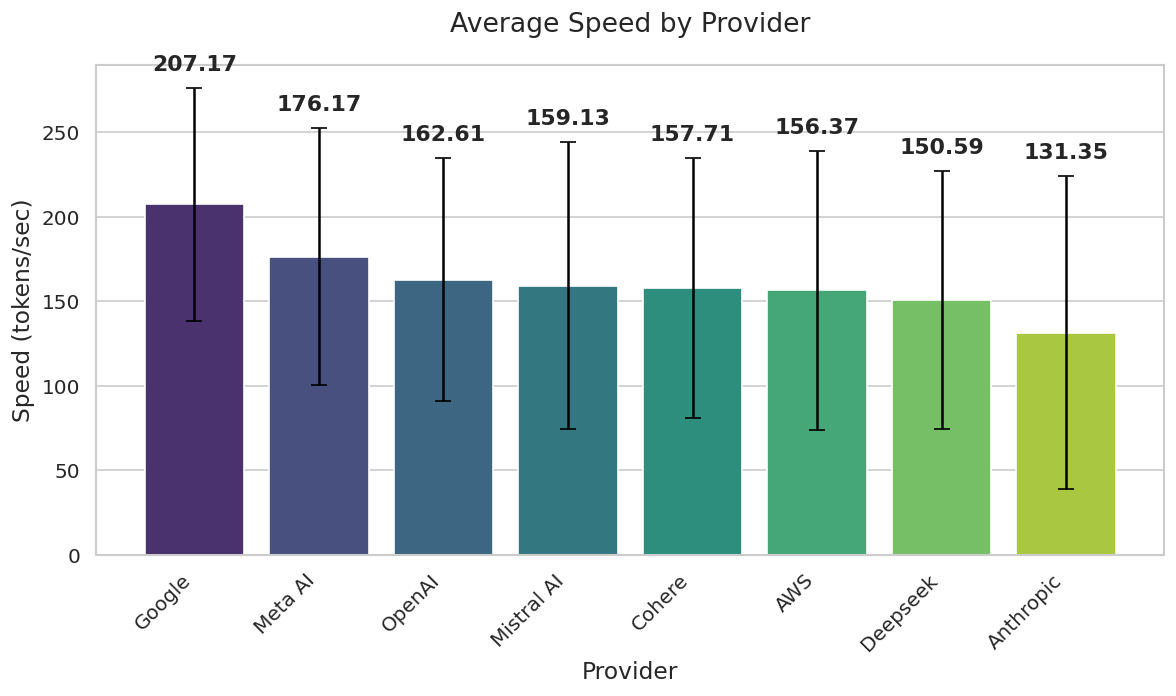

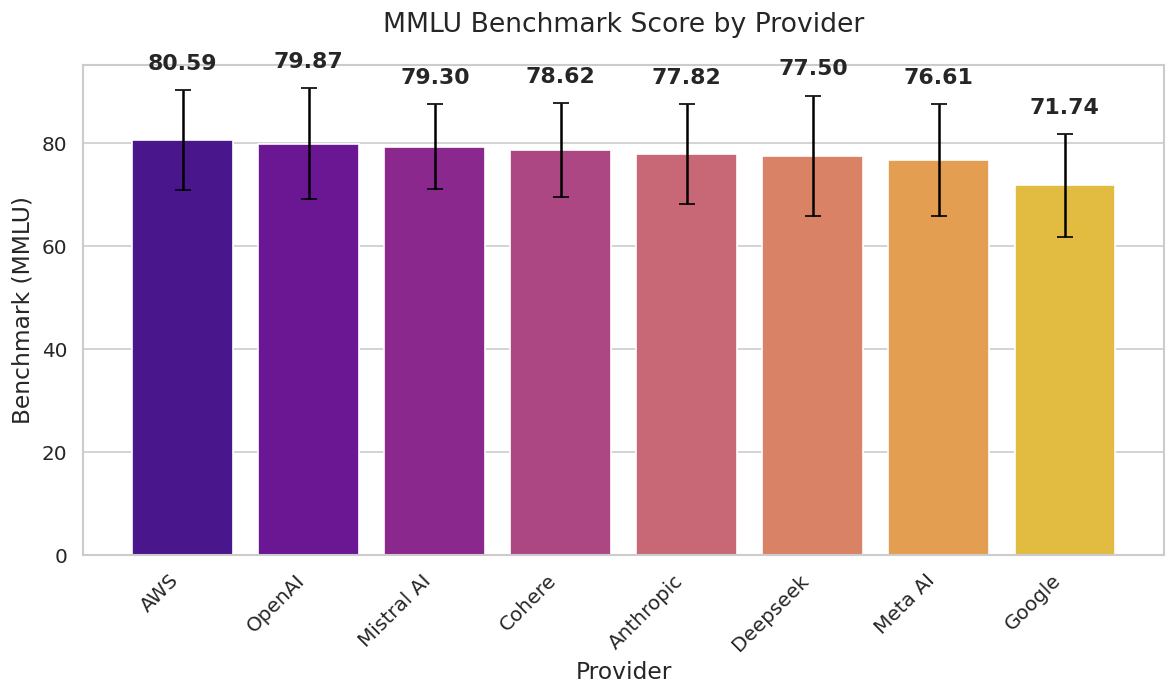

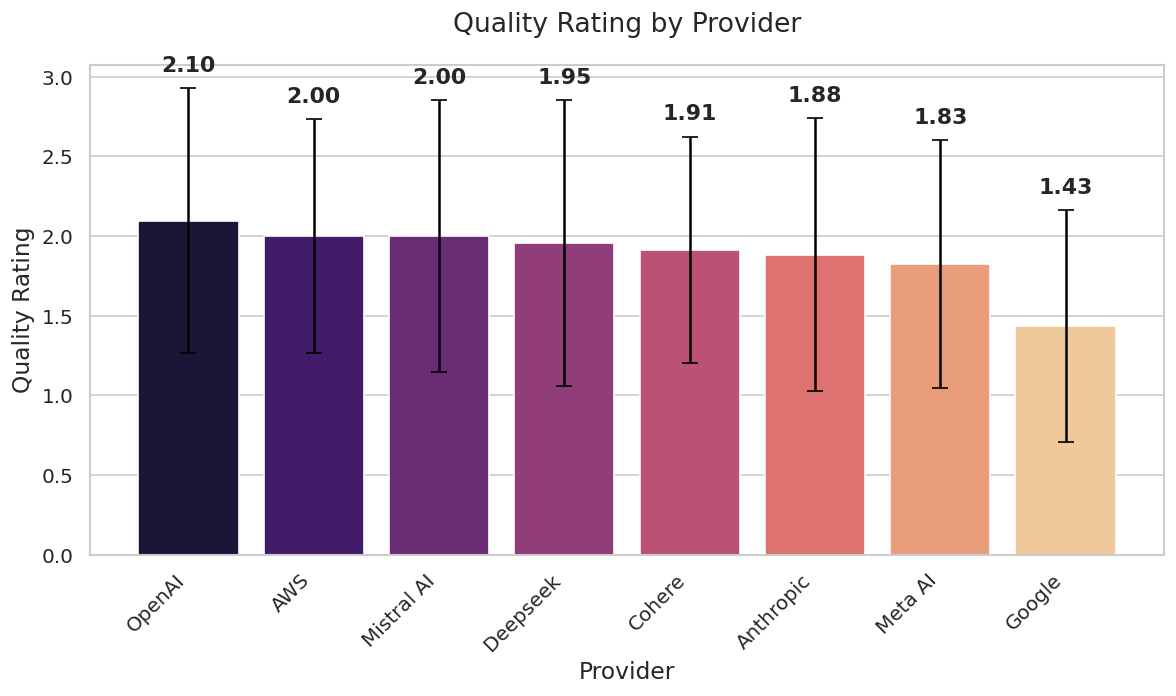

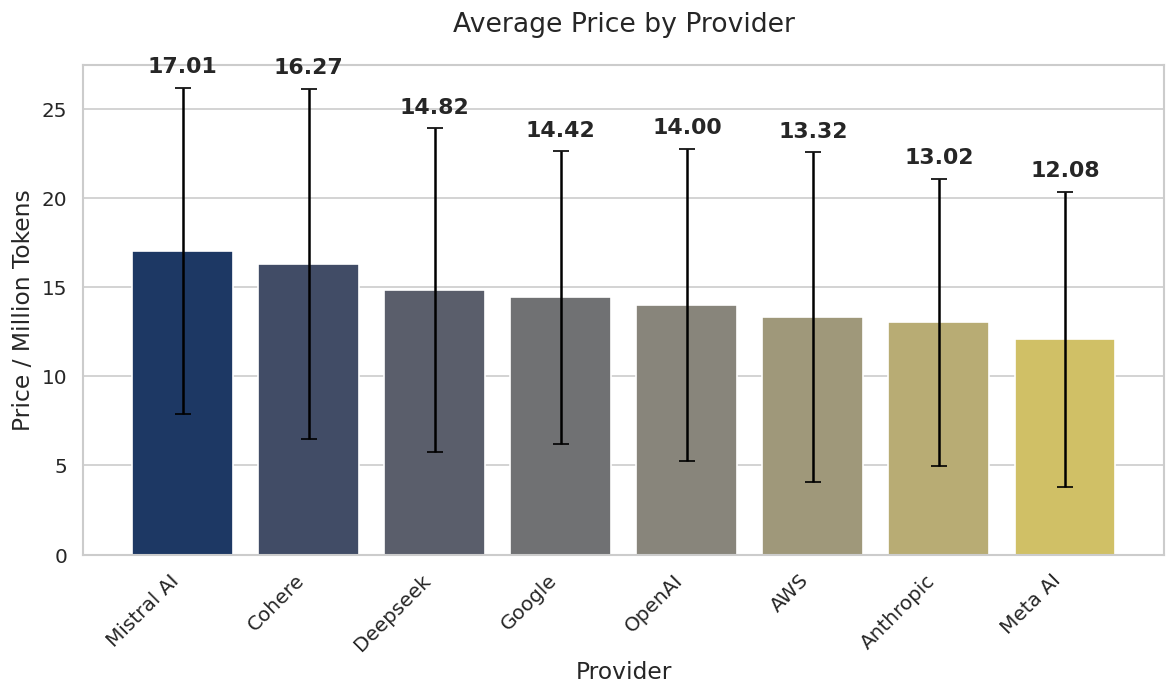

In [12]:
def plot_provider_metric(metric, title, color_palette='viridis'):
    plt.figure(figsize=(10, 6))
    
    means = df.groupby('Provider')[metric].mean().sort_values(ascending=False)
    stds = df.groupby('Provider')[metric].std().reindex(means.index)
    
    ax = sns.barplot(x=means.index, y=means.values, palette=color_palette)
    
    ax.errorbar(x=range(len(means)), y=means.values, yerr=stds.values, fmt='none', color='black', capsize=5)
    
    for i, v in enumerate(means.values):
        ax.text(i, v + stds.values[i] + 0.05 * max(means.values), 
                f"{v:.2f}", ha='center', fontweight='bold')
    
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Provider', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    return plt

metrics = [
    ('Speed (tokens/sec)', 'Average Speed by Provider', 'viridis'),
    ('Benchmark (MMLU)', 'MMLU Benchmark Score by Provider', 'plasma'),
    ('Quality Rating', 'Quality Rating by Provider', 'magma'),
    ('Price / Million Tokens', 'Average Price by Provider', 'cividis')
]

for metric, title, palette in metrics:
    plot_provider_metric(metric, title, palette)
    plt.show()

### 3.3 Benchmark Comparison

Let's visualize how models perform on different benchmarks and examine the relationship between benchmark scores.

In [13]:
fig = px.scatter(df, x='Benchmark (MMLU)', y='Benchmark (Chatbot Arena)', 
                color='Provider', size='Quality Rating', hover_name='Model',
                symbol='Open-Source',
                hover_data=['Speed (tokens/sec)', 'Price / Million Tokens'],
                title='MMLU vs. Chatbot Arena Benchmark Comparison',
                labels={'Benchmark (MMLU)': 'MMLU Score', 'Benchmark (Chatbot Arena)': 'Chatbot Arena Score'})

mmlu_mid = df['Benchmark (MMLU)'].median()
arena_mid = df['Benchmark (Chatbot Arena)'].median()

fig.add_hline(y=arena_mid, line_dash="dash", line_color="gray", opacity=0.7)
fig.add_vline(x=mmlu_mid, line_dash="dash", line_color="gray", opacity=0.7)

fig.add_annotation(x=df['Benchmark (MMLU)'].max()*0.9, y=df['Benchmark (Chatbot Arena)'].max()*0.9,
                  text="High MMLU & Arena", showarrow=False, font=dict(size=14))
fig.add_annotation(x=df['Benchmark (MMLU)'].min()*1.1, y=df['Benchmark (Chatbot Arena)'].max()*0.9,
                  text="Low MMLU, High Arena", showarrow=False, font=dict(size=14))
fig.add_annotation(x=df['Benchmark (MMLU)'].max()*0.9, y=df['Benchmark (Chatbot Arena)'].min()*1.1,
                  text="High MMLU, Low Arena", showarrow=False, font=dict(size=14))
fig.add_annotation(x=df['Benchmark (MMLU)'].min()*1.1, y=df['Benchmark (Chatbot Arena)'].min()*1.1,
                  text="Low MMLU & Arena", showarrow=False, font=dict(size=14))

fig.update_layout(height=600)
fig.show()

## 4. 🧠 Predictive Modeling

### 4.1 Feature Selection and Preparation

Let's prepare our data for modeling by selecting relevant features and splitting the dataset.

In [14]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop(columns=["Quality Rating", "Model"])
y = df["Quality Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📊 Training data shape: {X_train.shape}")
print(f"📊 Testing data shape: {X_test.shape}")

numeric_features = [
    "Context Window", "Speed (tokens/sec)", "Latency (sec)",
    "Benchmark (MMLU)", "Benchmark (Chatbot Arena)", "Price / Million Tokens",
    "Training Dataset Size", "Compute Power", "Energy Efficiency"
]
categorical_features = ["Provider", "Open-Source"]

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', None)
])

print("✅ Data preprocessing pipeline created")

📊 Training data shape: (160, 13)
📊 Testing data shape: (40, 13)
✅ Data preprocessing pipeline created


### 4.2 Model Training and Evaluation

Let's train various regression models and evaluate their performance on our dataset.

In [15]:
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'SVR': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    return pd.DataFrame({
        'Model': [model_name],
        'MAE': [mae],
        'RMSE': [rmse],
        'R²': [r2]
    })

results = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'R²'])

for name, model in models.items():
    print(f"🔍 Training {name}...")
    
    model_pipeline.steps[-1] = ('model', model)
    
    model_pipeline.fit(X_train, y_train)
    
    y_pred = model_pipeline.predict(X_test)
    
    model_results = evaluate_model(y_test, y_pred, name)
    results = pd.concat([results, model_results], ignore_index=True)

display(results.sort_values('RMSE').style.background_gradient(subset=['MAE', 'RMSE'], cmap='YlOrRd_r')
       .background_gradient(subset=['R²'], cmap='PuBu'))

🔍 Training Linear Regression...
🔍 Training ElasticNet...
🔍 Training SVR...
🔍 Training Random Forest...


<ipython-input-15-7f8bb2554613>:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



🔍 Training XGBoost...
🔍 Training KNN...


,Model,MAE,RMSE,R²
3,Random Forest,0.000000,0.000000,1.000000
4,XGBoost,0.000079,0.000096,1.000000
1,ElasticNet,0.228223,0.281449,0.882538
0,Linear Regression,0.294343,0.351446,0.816847
2,SVR,0.361927,0.434720,0.719767
5,KNN,0.510000,0.618061,0.433550


### 4.3 Model Optimization

Let's optimize the hyperparameters of our best-performing model to further improve its predictive power.

🏆 Best model: Random Forest
🔧 Optimizing Random Forest with RandomizedSearchCV...

✅ Best parameters: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': None}

📊 Base Random Forest RMSE: 0.0000
📊 Optimized Random Forest RMSE: 0.0000
📊 Improvement: nan%


<ipython-input-16-00b2ccd06440>:47: RuntimeWarning:

invalid value encountered in scalar divide



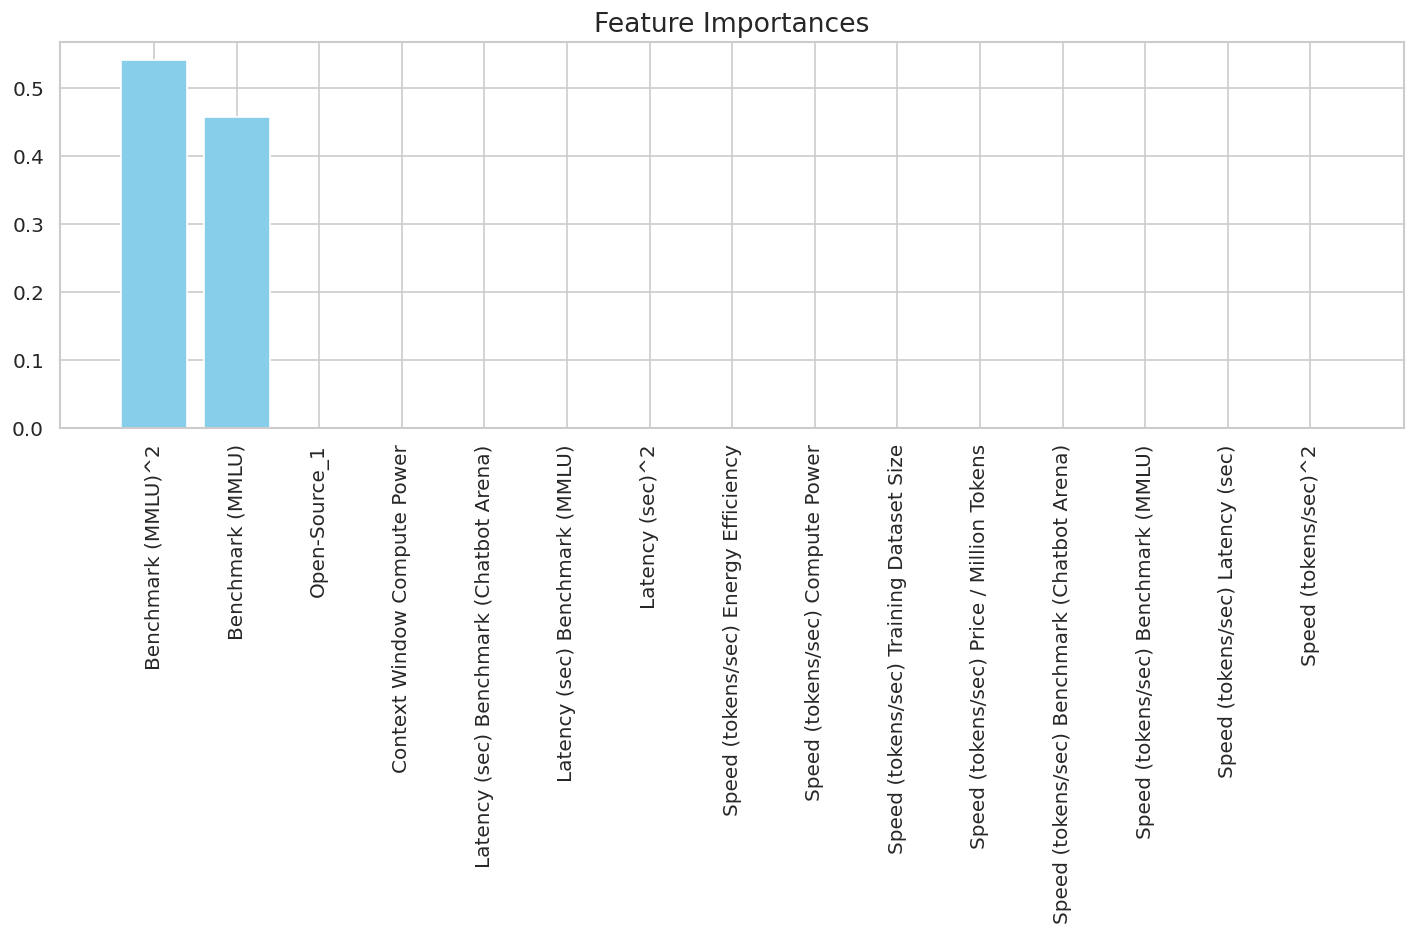

In [16]:
best_model_name = results.sort_values('RMSE').iloc[0]['Model']
print(f"🏆 Best model: {best_model_name}")

if best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.8, 0.9, 1.0],
        'model__colsample_bytree': [0.8, 0.9, 1.0]
    }
elif best_model_name == 'ElasticNet':
    param_grid = {
        'model__alpha': [0.001, 0.01, 0.1, 1.0],
        'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
else:
    param_grid = {
        'preprocessor__num__poly__degree': [1, 2]
    }

model_pipeline.steps[-1] = ('model', models[best_model_name])

print(f"🔧 Optimizing {best_model_name} with RandomizedSearchCV...")
search = RandomizedSearchCV(
    model_pipeline, param_grid, n_iter=20, 
    cv=5, scoring='neg_root_mean_squared_error',
    random_state=42, n_jobs=-1
)

search.fit(X_train, y_train)

print(f"\n✅ Best parameters: {search.best_params_}")

optimized_model = search.best_estimator_
y_pred_optimized = optimized_model.predict(X_test)

base_rmse = results[results['Model'] == best_model_name]['RMSE'].values[0]
optimized_rmse = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
improvement = ((base_rmse - optimized_rmse) / base_rmse) * 100

print(f"\n📊 Base {best_model_name} RMSE: {base_rmse:.4f}")
print(f"📊 Optimized {best_model_name} RMSE: {optimized_rmse:.4f}")
print(f"📊 Improvement: {improvement:.2f}%")

if best_model_name in ['Random Forest', 'XGBoost']:
    preprocessor = optimized_model.named_steps['preprocessor']
    model = optimized_model.named_steps['model']
    
    feature_names = []
    
    numeric_features_idx = preprocessor.transformers_[0][2]
    poly = preprocessor.transformers_[0][1].named_steps['poly']
    numeric_feature_names = poly.get_feature_names_out(np.array(numeric_features))
    
    categorical_features_idx = preprocessor.transformers_[1][2]
    onehot = preprocessor.transformers_[1][1].named_steps['onehot']
    categorical_feature_names = onehot.get_feature_names_out(np.array(categorical_features))
    
    feature_names = list(numeric_feature_names) + list(categorical_feature_names)
    
    if best_model_name == 'Random Forest':
        importances = model.feature_importances_
    else:
        importances = model.feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances", fontsize=16)
    plt.bar(range(len(indices[:15])), importances[indices[:15]], color='skyblue')
    plt.xticks(range(len(indices[:15])), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.show()

## 5. 🧪 Model Application

### 5.1 Prediction Function

Let's create a function that allows us to make predictions for new LLM configurations.

In [17]:
def predict_quality(model, new_data, feature_names):
    """    
    Predict the quality rating for a new LLM configuration.
    
    Parameters:
    - model: Trained model pipeline
    - new_data: Dictionary with LLM features
    - feature_names: List of expected feature names
    
    Returns:
    - Predicted quality rating
    """
    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data])
    
    for feature in feature_names:
        if feature not in new_data.columns:
            if feature in numeric_features:
                new_data[feature] = 0
            else:
                new_data[feature] = "Unknown"
    
    prediction = model.predict(new_data)
    
    return prediction[0]

example_llm = {
    'Provider': 'OpenAI',
    'Open-Source': False,
    'Context Window': 100000,
    'Speed (tokens/sec)': 150,
    'Latency (sec)': 0.5,
    'Benchmark (MMLU)': 82.0,
    'Benchmark (Chatbot Arena)': 92.0,
    'Price / Million Tokens': 8.0,
    'Training Dataset Size': 1500,
    'Compute Power': 85,
    'Energy Efficiency': 78
}

predicted_quality = predict_quality(optimized_model, example_llm, X.columns)
print(f"🔮 Predicted Quality Rating for example LLM: {predicted_quality:.2f}/10")

🔮 Predicted Quality Rating for example LLM: 2.00/10


### 5.2 Interactive Exploration Tool

Let's create an interactive tool to explore how different configurations affect the predicted quality rating.

In [18]:
from ipywidgets import interact, FloatSlider, Dropdown, IntSlider, fixed

providers = df['Provider'].unique().tolist()

@interact
def explore_quality_predictions(
    provider=Dropdown(options=providers, description='Provider:'),
    open_source=Dropdown(options=[True, False], description='Open-Source:'),
    context_window=IntSlider(min=1000, max=200000, step=1000, value=50000, description='Context Window:'),
    speed=FloatSlider(min=10, max=300, step=5, value=100, description='Speed (tokens/sec):'),
    latency=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Latency (sec):'),
    mmlu=FloatSlider(min=40, max=95, step=1, value=70, description='MMLU Score:'),
    arena=FloatSlider(min=40, max=95, step=1, value=70, description='Arena Score:'),
    price=FloatSlider(min=0.1, max=50, step=0.1, value=10, description='Price/Million:'),
    dataset_size=IntSlider(min=100, max=2000, step=100, value=1000, description='Dataset Size:'),
    compute=IntSlider(min=10, max=100, step=5, value=50, description='Compute Power:'),
    energy=IntSlider(min=10, max=100, step=5, value=50, description='Energy Efficiency:')
):
    new_llm = {
        'Provider': provider,
        'Open-Source': open_source,
        'Context Window': context_window,
        'Speed (tokens/sec)': speed,
        'Latency (sec)': latency,
        'Benchmark (MMLU)': mmlu,
        'Benchmark (Chatbot Arena)': arena,
        'Price / Million Tokens': price,
        'Training Dataset Size': dataset_size,
        'Compute Power': compute,
        'Energy Efficiency': energy
    }
    
    quality = predict_quality(optimized_model, new_llm, X.columns)
    
    if quality > 8.5:
        quality_class = "Excellent"
        emoji = "🌟"
    elif quality > 7.5:
        quality_class = "Very Good"
        emoji = "✨"
    elif quality > 6.5:
        quality_class = "Good"
        emoji = "👍"
    elif quality > 5.0:
        quality_class = "Average"
        emoji = "🔄"
    else:
        quality_class = "Below Average"
        emoji = "⚠️"
    
    print(f"{emoji} Predicted Quality Rating: {quality:.2f}/10 - {quality_class}")

interactive(children=(Dropdown(description='Provider:', options=('Deepseek', 'Meta AI', 'AWS', 'Anthropic', 'G…

### 5.3 Conclusion and Next Steps

Let's summarize our findings and outline potential next steps for further analysis.

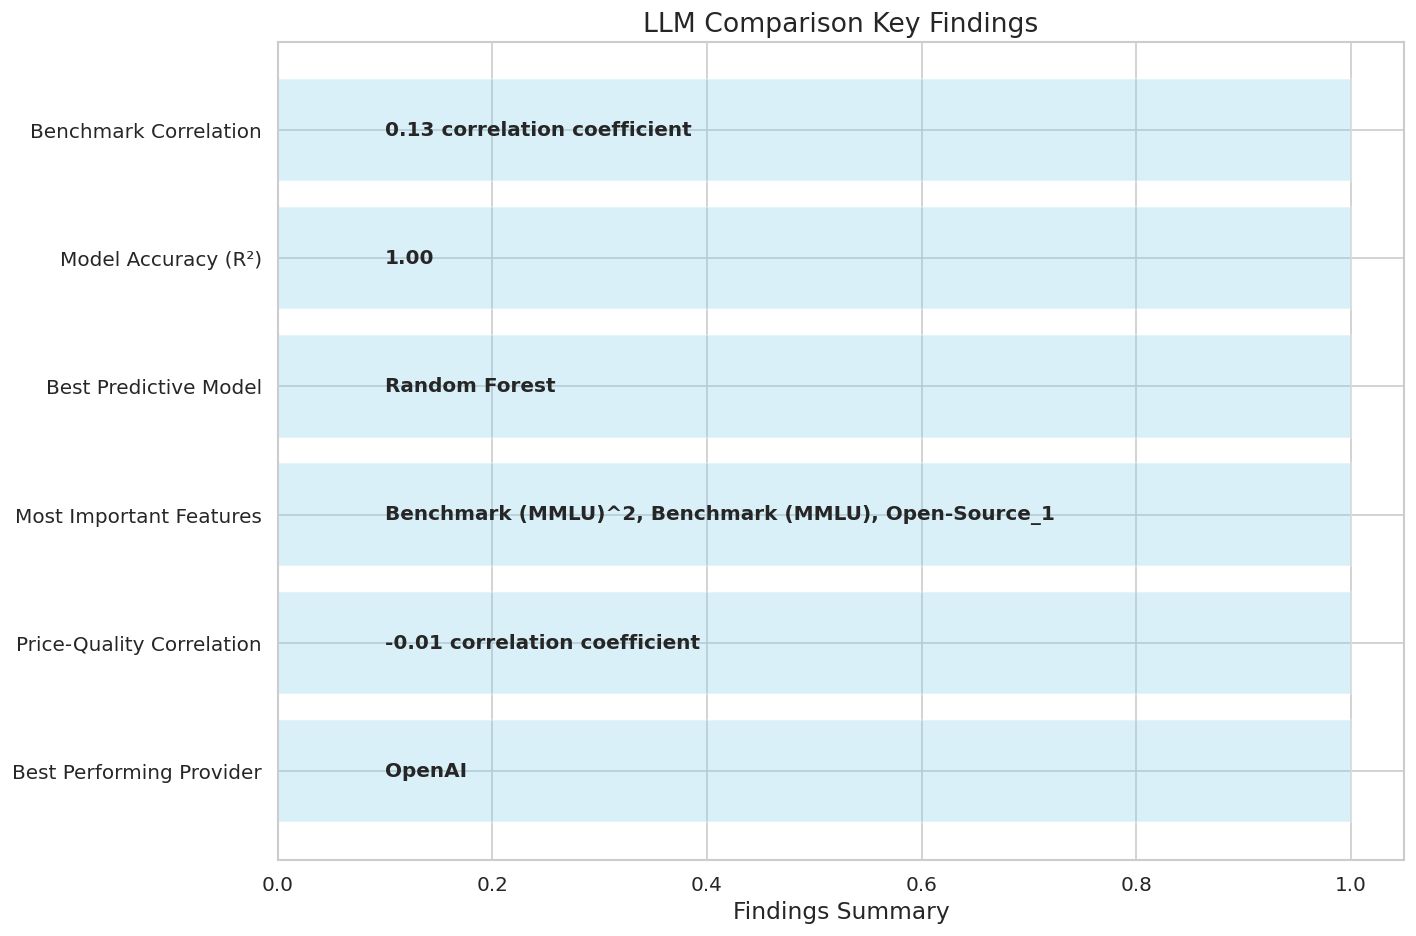


🔍 Next Steps for Analysis:
1. Collect more LLM models and increase dataset size
2. Incorporate more evaluation metrics (e.g., factuality, toxicity, etc.)
3. Develop a time-series analysis as models evolve
4. Create a cost-benefit analysis framework for model selection
5. Evaluate model performance across different domains and tasks


In [19]:
plt.figure(figsize=(12, 8))

summary_data = {
    'Finding': [
        'Best Performing Provider',
        'Price-Quality Correlation',
        'Most Important Features',
        'Best Predictive Model',
        'Model Accuracy (R²)',
        'Benchmark Correlation'
    ],
    'Result': [
        f"{provider_means['Quality Rating'].idxmax()}",
        f"{np.corrcoef(df['Price / Million Tokens'], df['Quality Rating'])[0,1]:.2f} correlation coefficient",
        ", ".join([feature_names[i] for i in indices[:3]]) if 'indices' in locals() else "N/A",
        best_model_name,
        f"{r2_score(y_test, y_pred_optimized):.2f}",
        f"{np.corrcoef(df['Benchmark (MMLU)'], df['Benchmark (Chatbot Arena)'])[0,1]:.2f} correlation coefficient"
    ]
}

y_pos = np.arange(len(summary_data['Finding']))

plt.barh(y_pos, [1]*len(y_pos), color='skyblue', alpha=0.3)
plt.yticks(y_pos, summary_data['Finding'], fontsize=12)
plt.xlabel('Findings Summary', fontsize=14)
plt.title('LLM Comparison Key Findings', fontsize=16)

for i, result in enumerate(summary_data['Result']):
    plt.text(0.1, i, result, va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔍 Next Steps for Analysis:")
print("1. Collect more LLM models and increase dataset size")
print("2. Incorporate more evaluation metrics (e.g., factuality, toxicity, etc.)")
print("3. Develop a time-series analysis as models evolve")
print("4. Create a cost-benefit analysis framework for model selection")
print("5. Evaluate model performance across different domains and tasks")